# Curve Fit
This program is a generic curve-fitting program.<br><br>
The program can be modified by editing the `curve_fit_function()`

In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from helper import aiken_plot_defaults

Import the data

In [25]:
data_path = "data/curve_fit_data.csv"
head = os.path.split(os.path.split(os.getcwd())[0])[0]
data = pd.read_csv(os.path.join(head,data_path))

In [26]:
x_data = np.array(data["x"])
y_data = np.array(data["y"])

Define a generic function to curve fit to 

In [27]:
def curve_fit_function(x, a, b, c):
    return a * x ** 2 + b * x + c

Perform the curve fit

In [28]:
popt, pcov = curve_fit(curve_fit_function, x_data, y_data, [1, 1, 1])
a, b, c = popt

Develop text string for the curve fit equation and other attributes

In [29]:
equation = f"${a:.3f}x^2 + {b:.3f}x + {c:.3f}$"
title = "Curve Fit with the Data"
x_label = "x-axis"
y_label = "y-axis"

Plot the data and the curve

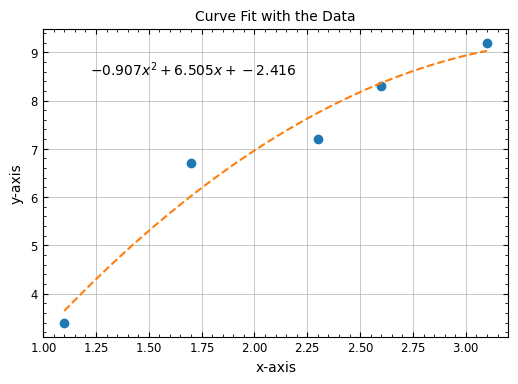

In [30]:
curve_x = np.linspace(x_data.min(), x_data.max(), 100)
curve_y = curve_fit_function(curve_x, a, b, c)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x_data, y_data, 'o', label='data')
ax.plot(curve_x, curve_y, '--', label='fit')
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.text(0.1, 0.85, equation, transform=ax.transAxes)
plt.show()